# Data Pre-Processing

### First, Let's import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import geopandas as geo
import random
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve, roc_curve, make_scorer
from skopt import BayesSearchCV
import warnings
warnings.filterwarnings("ignore")

### Let's read in the data set and put it in a DataFrame.

In [3]:
df= pd.read_csv('train.csv')

### Let's look at the first 10 rows of the data set.

In [5]:
df.head(10)

,id,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,weight.gain,material.possessions,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,Disorder
0,12345678,yes,yes,yes,yes,yes,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,Anxiety
1,12345679,no,no,no,no,no,no,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,Depression
2,12345680,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,no,no,no,no,no,no,Loneliness
3,12345681,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,yes,yes,yes,yes,Stress
4,12345682,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Normal
5,12345683,yes,yes,yes,yes,yes,yes,no,no,no,...,no,no,no,no,no,no,no,no,no,Anxiety
6,12345684,no,no,no,no,no,no,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,Depression
7,12345685,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,no,no,no,no,no,no,Loneliness
8,12345686,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,yes,yes,yes,yes,Stress
9,12345687,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Normal


### Let's look at the number of rows and columns we are working with.

In [7]:
df.shape

(30960, 26)

### Let's rename the columns so the '.'s are gotten rid of.

In [9]:
df.columns= ['id', 'feeling_nervous', 'panic', 'breathing_rapidly', 'sweating', 'trouble_in_concentration',
             'having_trouble_in_sleeping', 'having_trouble_with_work', 'hopelessness', 'anger', 'overreacting',
             'change_in_eating', 'suicidal_thoughts', 'feeling_tired', 'close_friends', 'social_media_addiction',
             'weight_gain', 'material_possessions', 'introvert', 'popping_up_stressful_memory', 'having_nightmares',
             'avoids_people_or_activities', 'feeling_negative', 'trouble_concentrating', 'blaming_themselves', 'Disorder']

### Let's check for null values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30960 entries, 0 to 30959
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           30960 non-null  int64 
 1   feeling_nervous              30960 non-null  object
 2   panic                        30960 non-null  object
 3   breathing_rapidly            30960 non-null  object
 4   sweating                     30960 non-null  object
 5   trouble_in_concentration     30960 non-null  object
 6   having_trouble_in_sleeping   30960 non-null  object
 7   having_trouble_with_work     30960 non-null  object
 8   hopelessness                 30960 non-null  object
 9   anger                        30960 non-null  object
 10  overreacting                 30960 non-null  object
 11  change_in_eating             30960 non-null  object
 12  suicidal_thoughts            30960 non-null  object
 13  feeling_tired                30

### Let's check if there are any duplicate columns.

In [13]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

### Let's now pre-process the data so that the model can be trained.

In [15]:
dfn= df.drop(['id'], axis= 1) # Drop the 'id' column.
dfn= dfn.sample(frac=1).reset_index(drop=True) # Shuffle the data.
listcol= dfn.columns.tolist() # Create a list of the remaining columns.
le= preprocessing.LabelEncoder()
for i in range(0, len(listcol)): # Create a 'for' loop that will cycle through those columns.
    dfn[listcol[i]]= le.fit_transform(dfn[listcol[i]]) # Replace all categorical values with numbers.
dfn.head() # Make sure the conversions worked by looking at the first 5 rows.

,feeling_nervous,panic,breathing_rapidly,sweating,trouble_in_concentration,having_trouble_in_sleeping,having_trouble_with_work,hopelessness,anger,overreacting,...,weight_gain,material_possessions,introvert,popping_up_stressful_memory,having_nightmares,avoids_people_or_activities,feeling_negative,trouble_concentrating,blaming_themselves,Disorder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,4
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,4


### Let's create a new column that shows whether or not the person has a mental illness.

In [17]:
dfn['MentalIllness'] = dfn["Disorder"].apply(lambda x: 0 if (x== 3) else 1)
dfn.head()

,feeling_nervous,panic,breathing_rapidly,sweating,trouble_in_concentration,having_trouble_in_sleeping,having_trouble_with_work,hopelessness,anger,overreacting,...,material_possessions,introvert,popping_up_stressful_memory,having_nightmares,avoids_people_or_activities,feeling_negative,trouble_concentrating,blaming_themselves,Disorder,MentalIllness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,4,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,4,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,2,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,4,1


### Let's create our x and y data sets.

In [19]:
x1= dfn.drop(['MentalIllness', 'Disorder'], axis= 1) 
y1= dfn['MentalIllness']

### Now we can split the data into a training set and validation set using an 80/20 ratio.

In [23]:
xtrn1, xvd1, ytrn1, yvd1 = train_test_split(x1, y1, train_size=0.8, test_size=0.2, random_state=0)

# Model 1: Binary XG Boost Classifier to Determine if the Patient is Mentally Ill or Not

### Here we are creating an paramter optimization space using:
- learning_rate: the rate at which the model will converge to a solution.
- n_estimators: the number of decision trees that will be utilized by the model.
- max_depth: Controls the maximum depth of each tree in the forest. 
- min_child_weight: If the tree's partition step results in a node with a weight less than this specified value, the building process will stop.  The larger this is, the less likely the model's trees will be to create new splits.
- gamma: The minimum loss reduction needed to make a new nod. The larger this is, the less likely the model's trees will be to create new splits.
- colsample_bytree: Specifies what percentage of columns will be used to build each decision tree.

In [25]:
# Define the parameter grid
param_space= {'learning_rate': (0.01, 0.3, 'log-uniform'), 'n_estimators': (50, 900), 'max_depth': (3, 10),
    'min_child_weight': (1, 10), 'gamma': (0, 5.0), 'colsample_bytree': (0.5, 1.0)
}

# Define the model
model1 = XGBClassifier(eval_metric='logloss', random_state=42)

# Use Bayesian cross-validation 
bsearch1= BayesSearchCV(
    estimator= model1, search_spaces= param_space, scoring= make_scorer(f1_score, average='weighted'),
    cv= StratifiedKFold(n_splits=3), n_iter=30, random_state=0, verbose=0
)
# Fit the data using the best parameters.
bsearch1.fit(xtrn1, ytrn1)

# Use the model on the validation set
bmodel1 = bsearch1.best_estimator_
ypred1 = bmodel1.predict(xvd1)
yprob1= bmodel1.predict_proba(xvd1)

# Store scoring metrics in a separate data frame
sdf= pd.DataFrame({'accuracy': accuracy_score(yvd1, ypred1), 'precision': precision_score(yvd1, ypred1), 'recall': recall_score(yvd1, ypred1),
                  'f1': f1_score(yvd1, ypred1), 'auc': roc_auc_score(yvd1, yprob1[:,1])}, index= pd.Index([0]))

# Evaluate the model
print("Validation Accuracy Score:", accuracy_score(yvd1, ypred1))

Validation Accuracy Score: 1.0


### Let's see what the best parameters were.

In [27]:
print("Best Parameters:", bsearch1.best_params_)

Best Parameters: OrderedDict({'colsample_bytree': 0.7654820824760737, 'gamma': 3.380397544384568, 'learning_rate': 0.08314149149079444, 'max_depth': 8, 'min_child_weight': 9, 'n_estimators': 883})


### Let's create a classification report to output all of the performance metrics.

In [29]:
print(classification_report(ypred1, yvd1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1220
           1       1.00      1.00      1.00      4972

    accuracy                           1.00      6192
   macro avg       1.00      1.00      1.00      6192
weighted avg       1.00      1.00      1.00      6192



# Let's visualize the model's performance by seeing where it may have had trouble with predictions.

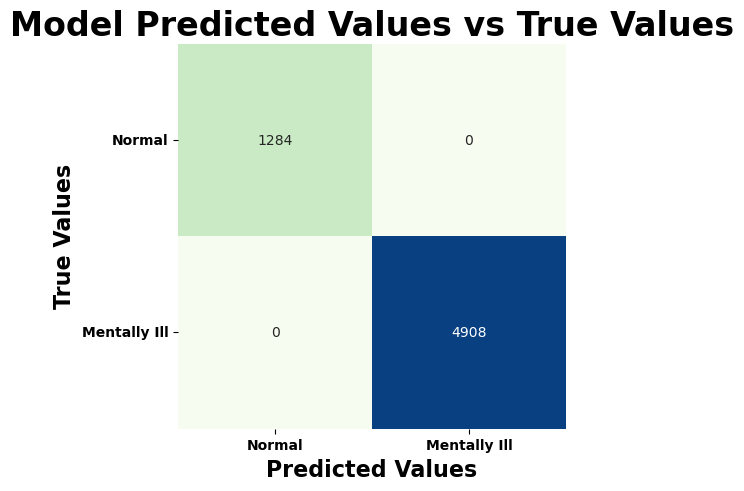

In [560]:
# Create the confusion matrix with the desired x and y labels
cm1= confusion_matrix(yvd1, ypred1)
plt.figure(figsize= (5, 5))
ax= sns.heatmap(cm1, annot= True, fmt= 'd', cmap='GnBu', cbar= False)
labels= ['Normal', 'Mentally Ill']
plt.title('Model Predicted Values vs True Values', fontsize= 24, weight= 'bold')
ax.set_xticklabels(labels, weight= 'bold')
ax.set_yticklabels(labels, rotation= 0, weight= 'bold')
ax.set_ylabel('True Values', weight= 'bold', fontsize= 16)
ax.set_xlabel('Predicted Values', weight= 'bold', fontsize= 16)
plt.savefig('conmat.png')

### The model achieved 100% accuracy on the validation set!

### Another way to evaluate the model's performance is by creating an ROC-AUC Curve and also a Precision-Recall Curve.

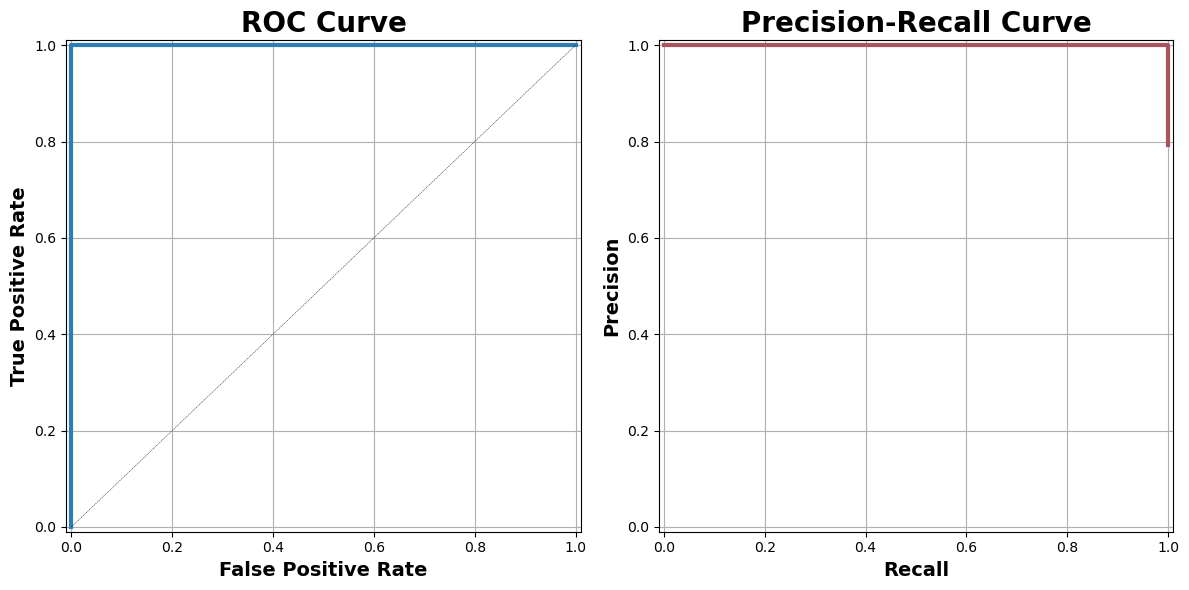

In [562]:
# Define the subplot parameters
fig, axList= plt.subplots(ncols= 2)
fig.set_size_inches(12,6)

#Create the ROC-AUC Curve
ax= axList[0]
fpr, tpr, thresholds= roc_curve(yvd1, yprob1[:, 1])
ax.plot(fpr, tpr, color= '#2c7eb4', linewidth= 3)
ax.plot([0, 1], [0, 1], ls= '--', color= 'black', lw= 0.3)
ax.set(xlim= [-0.01, 1.01], ylim= [-0.01, 1.01])
ax.set_ylabel('True Positive Rate', fontsize= 14, weight= 'bold')
ax.set_xlabel('False Positive Rate', fontsize= 14, weight= 'bold')
ax.set_title('ROC Curve', fontsize= 20, weight= 'bold')
ax.grid(True)

#Create the Precision-Recall Curve
ax= axList[1]
precision, recall, _ = precision_recall_curve(yvd1, yprob1[:, 1])
ax.plot(recall, precision, color= '#a9545e', linewidth= 3)
ax.set(xlim= [-0.01, 1.01], ylim= [-0.01, 1.01])
ax.set_ylabel('Precision', fontsize= 14, weight= 'bold')
ax.set_xlabel('Recall', fontsize= 14, weight= 'bold')
ax.set_title('Precision-Recall Curve', fontsize= 20, weight= 'bold')
ax.grid(True)
plt.tight_layout()

### Let's create a SHAP Explainer and summary plot.

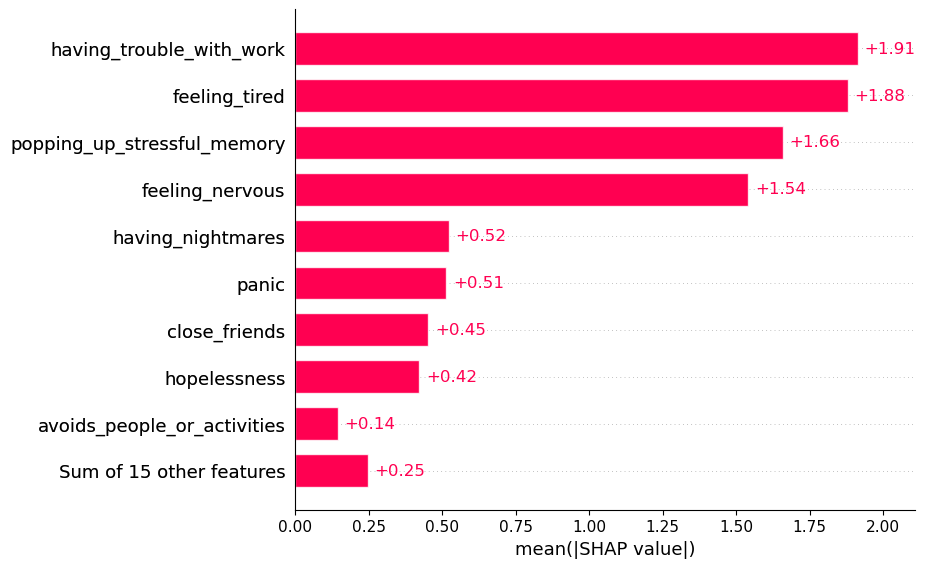

In [564]:
exp= shap.Explainer(bmodel1, xvd1)
shapvals= exp(xvd1)
shap.plots.bar(shapvals)

# Model 2: Binary Random Forest Classifier to Determine if the Patient is Mentally Ill or Not

### Here we are creating an paramter optimization space using:
- n_estimators: The number of decision trees we want to utilize within the forest.
- max_depth: the maximum depth of each tree in the forest.
- min_samples_split: Controls the minimum number of samples needed at each node to split further.
- min_samples_leaf: Specifies the minimum number of samples needed at each newly created node.

In [569]:
# Define the parameter grid
param_space= {'n_estimators': (50, 900), 'max_depth': (3, 10), 'min_samples_split': (2, 10), 
              'min_samples_leaf': (1, 10)
}

# Define the model
model2 = RandomForestClassifier(random_state=42)

# Use Bayesian cross-validation 
bsearch2= BayesSearchCV(
    estimator= model2, search_spaces= param_space, scoring= make_scorer(f1_score, average='weighted'),
    cv= StratifiedKFold(n_splits=3), n_iter=30, random_state=0, verbose=0
)
# Fit the data using the best parameters.
bsearch2.fit(xtrn1, ytrn1)

# Use the model on the validation set
bmodel2 = bsearch1.best_estimator_
ypred2 = bmodel2.predict(xvd1)
yprob2= bmodel2.predict_proba(xvd1)

# Store scoring metrics in a separate data frame
sdf= pd.DataFrame({'accuracy': accuracy_score(yvd1, ypred2), 'precision': precision_score(yvd1, ypred2), 'recall': recall_score(yvd1, ypred2),
                  'f1': f1_score(yvd1, ypred2), 'auc': roc_auc_score(yvd1, yprob2[:,1])}, index= pd.Index([0]))

# Evaluate the model
print("Validation Accuracy Score:", accuracy_score(yvd1, ypred2))

Validation Accuracy Score: 1.0


### Let's see what the best parameters were.

In [571]:
print("Best Parameters:", bsearch2.best_params_)

Best Parameters: OrderedDict({'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 600})


### Let's create a classification report.

In [573]:
print(classification_report(ypred2, yvd1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      1.00      1.00      4908

    accuracy                           1.00      6192
   macro avg       1.00      1.00      1.00      6192
weighted avg       1.00      1.00      1.00      6192



### Let's visualize where the model may have had trouble with predictions.

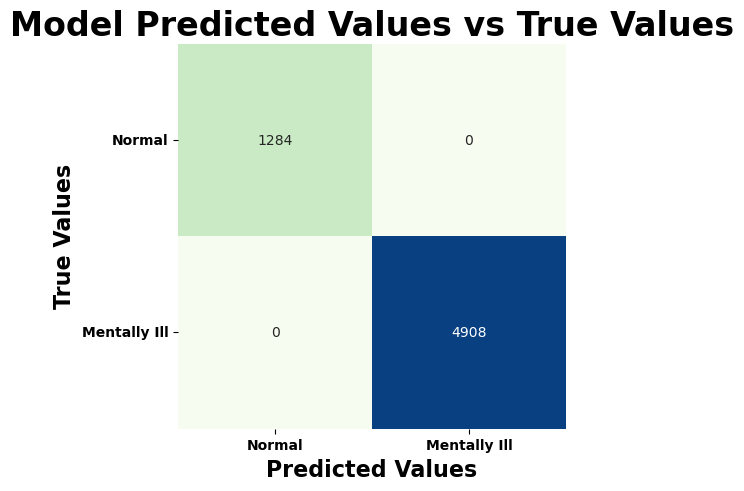

In [575]:
# Create the confusion matrix with the desired x and y labels
cm1= confusion_matrix(yvd1, ypred2)
plt.figure(figsize= (5, 5))
ax= sns.heatmap(cm1, annot= True, fmt= 'd', cmap='GnBu', cbar= False)
labels= ['Normal', 'Mentally Ill']
plt.title('Model Predicted Values vs True Values', fontsize= 24, weight= 'bold')
ax.set_xticklabels(labels, weight= 'bold')
ax.set_yticklabels(labels, rotation= 0, weight= 'bold')
ax.set_ylabel('True Values', weight= 'bold', fontsize= 16)
ax.set_xlabel('Predicted Values', weight= 'bold', fontsize= 16)
plt.savefig('conmat.png')

### Let's create an ROC-AUC curve as well as a Precision-Recall Curve.

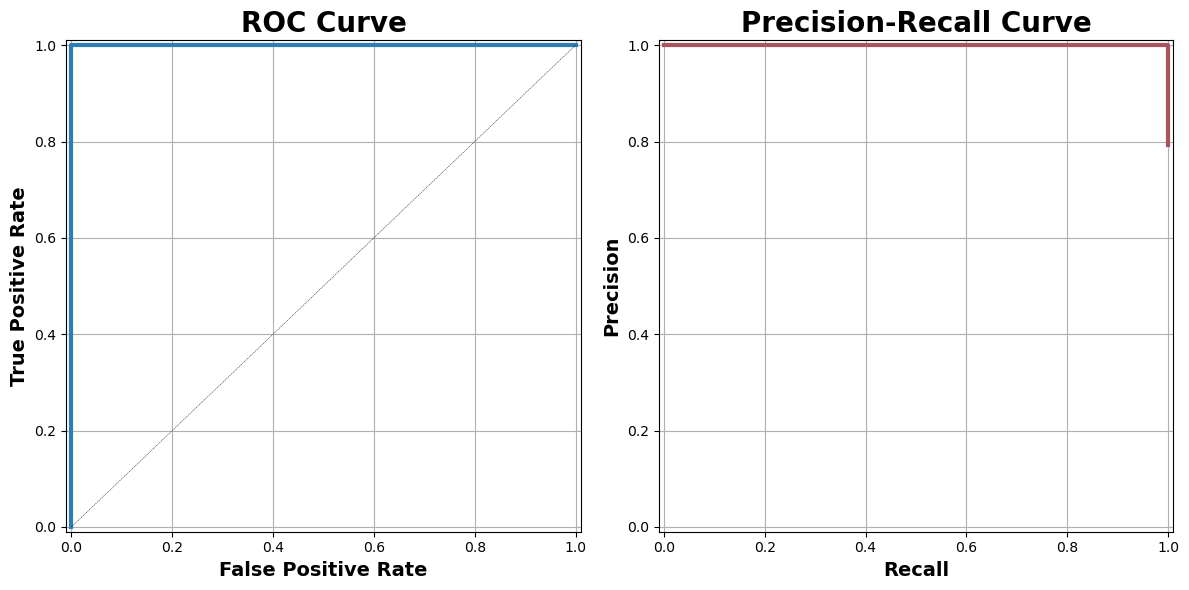

In [577]:
# Define the subplot parameters
fig, axList= plt.subplots(ncols= 2)
fig.set_size_inches(12,6)

#Create the ROC-AUC Curve
ax= axList[0]
fpr, tpr, thresholds= roc_curve(yvd1, yprob2[:, 1])
ax.plot(fpr, tpr, color= '#2c7eb4', linewidth= 3)
ax.plot([0, 1], [0, 1], ls= '--', color= 'black', lw= 0.3)
ax.set(xlim= [-0.01, 1.01], ylim= [-0.01, 1.01])
ax.set_ylabel('True Positive Rate', fontsize= 14, weight= 'bold')
ax.set_xlabel('False Positive Rate', fontsize= 14, weight= 'bold')
ax.set_title('ROC Curve', fontsize= 20, weight= 'bold')
ax.grid(True)

#Create the Precision-Recall Curve
ax= axList[1]
precision, recall, _ = precision_recall_curve(yvd1, yprob2[:, 1])
ax.plot(recall, precision, color= '#a9545e', linewidth= 3)
ax.set(xlim= [-0.01, 1.01], ylim= [-0.01, 1.01])
ax.set_ylabel('Precision', fontsize= 14, weight= 'bold')
ax.set_xlabel('Recall', fontsize= 14, weight= 'bold')
ax.set_title('Precision-Recall Curve', fontsize= 20, weight= 'bold')
ax.grid(True)
plt.tight_layout()

### Let's create a SHAP explainer and summary plot.

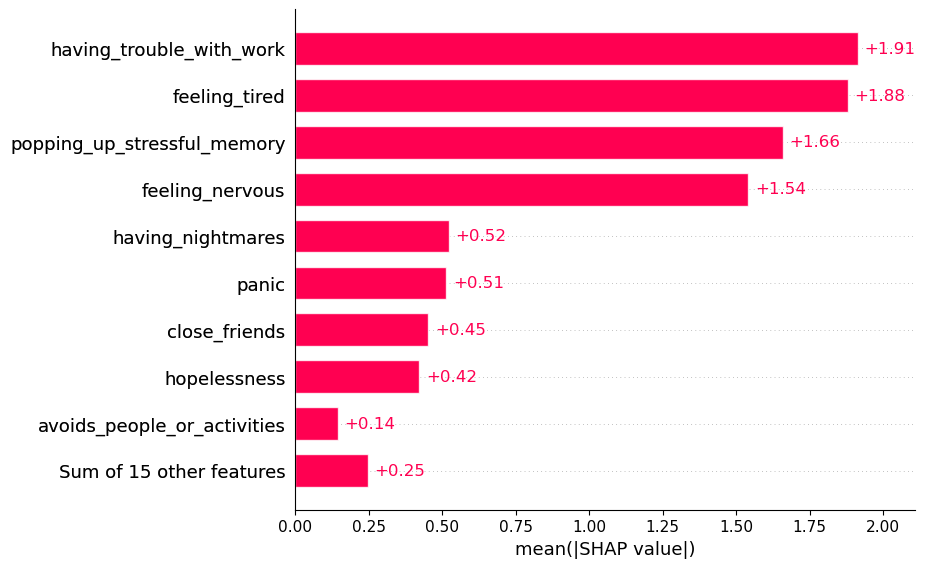

In [581]:
exp2= shap.Explainer(bmodel2, xvd1)
shapvals2= exp2(xvd1)
shap.plots.bar(shapvals2)

### Feature 3 appears to have had more impact than the others in determining the outcome of the predicted class.

# Model 3: Binary Logistic Classifier to Determine if the Patient is Mentally Ill or Not

### Here we are creating an paramter optimization space using:
- penalty: The combination of penalization terms to prevent overfitting.
- C: the term that controls the amount of regularization.
- max_iter: Controls how many iterations the solver can utilize to reach an output prediction.
- l1_ratio: 0 means the model uses strictly L2 regularization, while 1 means the model uses strictly L1. Between 0 and 1 is a combination of them.

In [583]:
# Define the parameter grid
param_space= {'penalty': ('l1', 'l2', 'elasticnet', None), 'C': (0.00001, 5.0), 
              'max_iter': (0, 100), 'l1_ratio': (0,1)
}

# Define the model
model3 = LogisticRegression(solver= 'saga', random_state=42)

# Use Bayesian cross-validation 
bsearch3= BayesSearchCV(
    estimator= model3, search_spaces= param_space, scoring= make_scorer(f1_score, average='weighted'),
    cv= StratifiedKFold(n_splits=3), n_iter=30, random_state=0, verbose=0
)
# Fit the data using the best parameters.
bsearch3.fit(xtrn1, ytrn1)

# Use the model on the validation set
bmodel3 = bsearch3.best_estimator_
ypred3 = bmodel3.predict(xvd1)
yprob3= bmodel3.predict_proba(xvd1)

# Store scoring metrics in a separate data frame
sdf= pd.DataFrame({'accuracy': accuracy_score(yvd1, ypred3), 'precision': precision_score(yvd1, ypred3), 'recall': recall_score(yvd1, ypred3),
                  'f1': f1_score(yvd1, ypred3), 'auc': roc_auc_score(yvd1, yprob3[:,1])}, index= pd.Index([0]))

# Evaluate the model
print("Validation Accuracy Score:", accuracy_score(yvd1, ypred3))

Validation Accuracy Score: 1.0


### Let's see what the best parameters were.

In [585]:
print("Best Parameters:", bsearch3.best_params_)

Best Parameters: OrderedDict({'C': 2.6548255151190876, 'l1_ratio': 1, 'max_iter': 62, 'penalty': 'elasticnet'})


### Let's create a classification report.

In [587]:
print(classification_report(ypred3, yvd1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      1.00      1.00      4908

    accuracy                           1.00      6192
   macro avg       1.00      1.00      1.00      6192
weighted avg       1.00      1.00      1.00      6192



### Let's visualize where the model may have had trouble with predictions.

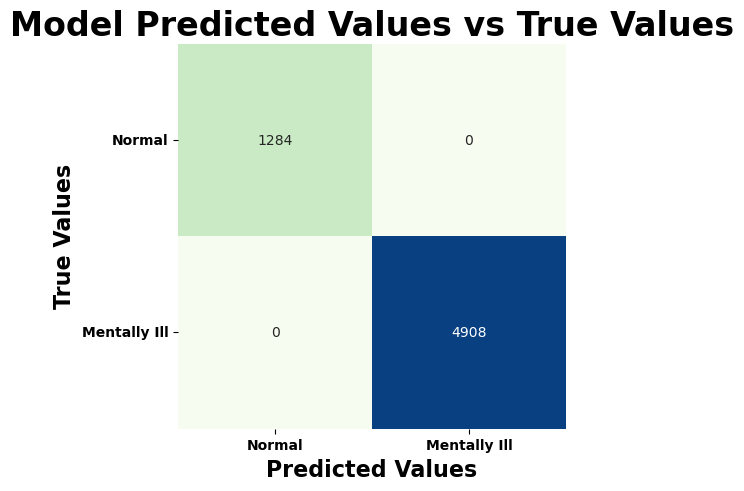

In [589]:
# Create the confusion matrix with the desired x and y labels
cm3= confusion_matrix(yvd1, ypred3)
plt.figure(figsize= (5, 5))
ax= sns.heatmap(cm3, annot= True, fmt= 'd', cmap='GnBu', cbar= False)
labels= ['Normal', 'Mentally Ill']
plt.title('Model Predicted Values vs True Values', fontsize= 24, weight= 'bold')
ax.set_xticklabels(labels, weight= 'bold')
ax.set_yticklabels(labels, rotation= 0, weight= 'bold')
ax.set_ylabel('True Values', weight= 'bold', fontsize= 16)
ax.set_xlabel('Predicted Values', weight= 'bold', fontsize= 16)
plt.savefig('conmat3.png')

### Let's create an ROC-AUC curve and a Precision-Recall curve.

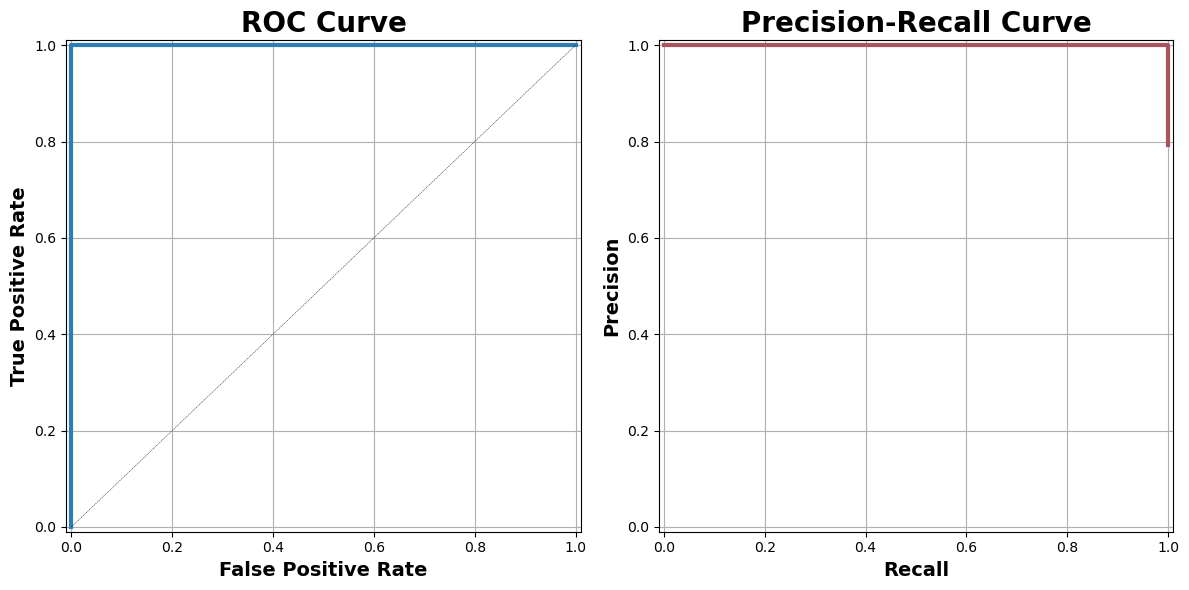

In [591]:
# Define the subplot parameters
fig, axList= plt.subplots(ncols= 2)
fig.set_size_inches(12,6)

#Create the ROC-AUC Curve
ax= axList[0]
fpr, tpr, thresholds= roc_curve(yvd1, yprob3[:, 1])
ax.plot(fpr, tpr, color= '#2c7eb4', linewidth= 3)
ax.plot([0, 1], [0, 1], ls= '--', color= 'black', lw= 0.3)
ax.set(xlim= [-0.01, 1.01], ylim= [-0.01, 1.01])
ax.set_ylabel('True Positive Rate', fontsize= 14, weight= 'bold')
ax.set_xlabel('False Positive Rate', fontsize= 14, weight= 'bold')
ax.set_title('ROC Curve', fontsize= 20, weight= 'bold')
ax.grid(True)

#Create the Precision-Recall Curve
ax= axList[1]
precision, recall, _ = precision_recall_curve(yvd1, yprob3[:, 1])
ax.plot(recall, precision, color= '#a9545e', linewidth= 3)
ax.set(xlim= [-0.01, 1.01], ylim= [-0.01, 1.01])
ax.set_ylabel('Precision', fontsize= 14, weight= 'bold')
ax.set_xlabel('Recall', fontsize= 14, weight= 'bold')
ax.set_title('Precision-Recall Curve', fontsize= 20, weight= 'bold')
ax.grid(True)
plt.tight_layout()

### Let's create a SHAP Explainer and summary plot.

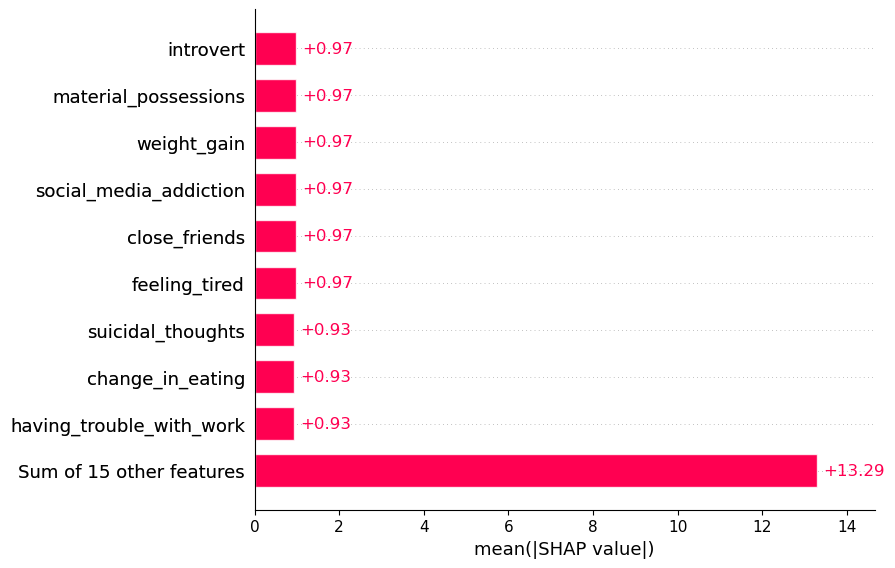

In [594]:
exp3= shap.Explainer(bmodel3, xvd1)
shapvals3= exp3(xvd1)
shap.plots.bar(shapvals3)

# Model 4: XGBoost Multi-Class Classifier to Determine what Mental Illness the Mentally Ill Patients Have.

### Let's redefine a new data set that doesnt contain the previously created 'MentalIllness' column.

In [596]:
mcdf= df

### Let's drop the rows that contain patients that were not diagnosed with any mental illness.

In [598]:
mcdf= mcdf[mcdf['Disorder']!= 'Normal']

### Let's make sure this was done correctly.

In [600]:
mcdf['Disorder'].unique()

array(['Anxiety', 'Depression', 'Loneliness', 'Stress'], dtype=object)

### Let's run the label encoder on mcdf.

In [602]:
listcol2= mcdf.columns.tolist() # Create a list of the remaining columns.
le2= preprocessing.LabelEncoder()
for i in range(0, len(listcol2)): # Create a 'for' loop that will cycle through those columns.
    mcdf[listcol2[i]]= le2.fit_transform(mcdf[listcol2[i]]) # Replace all categorical values with numbers.

### Now we can define x and y.

In [604]:
x2= mcdf.drop(['Disorder'], axis= 1)
y2= mcdf['Disorder']

### Now we can run feature reduction on x2 like we did for x1 earlier.

In [606]:
# Use 5 features and scale the data using PCA.
mhpca2= PCA(n_components= 5)
mhdata2= mhpca2.fit_transform(x2)

### Let's split the data into training and validation sets.

In [608]:
xtrn2, xvd2, ytrn2, yvd2 = train_test_split(mhdata2, y2, train_size=0.8, test_size=0.2, random_state=0)

### Let's create another XGBoost Model for this classification problem.

In [610]:
# Define the parameter grid
param_space= {'learning_rate': (0.01, 0.3, 'log-uniform'), 'n_estimators': (50, 900), 'max_depth': (3, 10),
    'min_child_weight': (1, 10), 'gamma': (0, 5.0), 'subsample': (0.5, 1.0), 'colsample_bytree': (0.5, 1.0)
}

# Define the model
model4 = XGBClassifier(eval_metric='logloss', random_state=42)

# Use Bayesian cross-validation 
bsearch4= BayesSearchCV(
    estimator= model4, search_spaces= param_space, scoring= make_scorer(f1_score, average='weighted'),
    cv= StratifiedKFold(n_splits=3), n_iter=30, random_state=0, verbose=0
)
# Fit the data using the best parameters.
bsearch4.fit(xtrn2, ytrn2)

# Use the model on the validation set
bmodel4 = bsearch4.best_estimator_
ypred4 = bmodel4.predict(xvd2)

# Evaluate the model
print("Validation Accuracy Score:", accuracy_score(yvd2, ypred4))

Validation Accuracy Score: 1.0


### Let's visualize this model's performance as well.

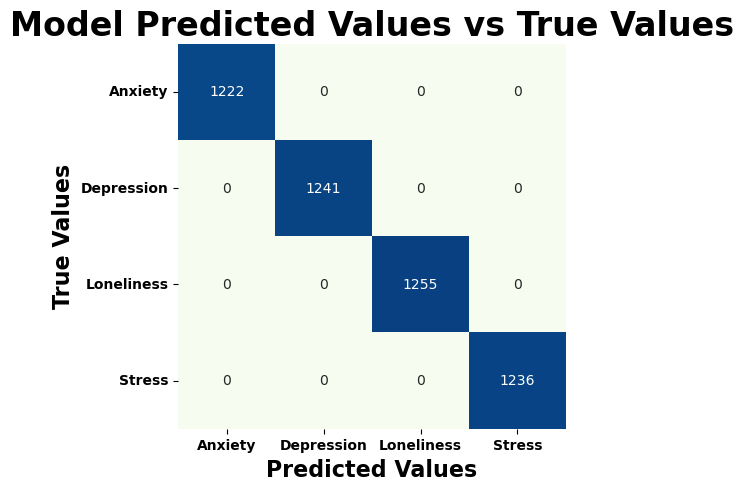

In [612]:
cm= confusion_matrix(yvd2, ypred4)
plt.figure(figsize= (5, 5))
ax= sns.heatmap(cm, annot= True, fmt= 'd', cmap='GnBu', cbar= False)
labels= ['Anxiety', 'Depression', 'Loneliness', 'Stress']
plt.title('Model Predicted Values vs True Values', fontsize= 24, weight= 'bold')
ax.set_xticklabels(labels, weight= 'bold')
ax.set_yticklabels(labels, rotation= 0, weight= 'bold')
ax.set_ylabel('True Values', weight= 'bold', fontsize= 16)
ax.set_xlabel('Predicted Values', weight= 'bold', fontsize= 16)
plt.savefig('conmat4.png')

### Let's create a SHAP Explainer and summary plot.

In [624]:
exp4= shap.Explainer(bmodel4, xvd2)
shapvals4= exp4.shap_values(xvd2)
shap.plots.bar(shapvals4)
# Working on resolving this.

 99%|===================| 19605/19816 [00:48<00:00]        

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

# Model 5: Multi-Class Random Forest Classifier to Determine what Mental Illness the Patient Has

In [ ]:
# Define the parameter grid
param_space= {'n_estimators': (50, 900), 'max_depth': (3, 10), 'min_samples_split': (2, 10), 
              'min_samples_leaf': (1, 10)
}

# Define the model
model5 = RandomForestClassifier(random_state=42)

# Use Bayesian cross-validation 
bsearch5= BayesSearchCV(
    estimator= model5, search_spaces= param_space, scoring= make_scorer(f1_score, average='weighted'),
    cv= StratifiedKFold(n_splits=3), n_iter=30, random_state=0, verbose=0
)
# Fit the data using the best parameters.
bsearch5.fit(xtrn2, ytrn2)

# Use the model on the validation set
bmodel5 = bsearch5.best_estimator_
ypred5 = bmodel5.predict(xvd2)

In [245]:
print(classification_report(ypred5, yvd2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1241
           2       1.00      1.00      1.00      1255
           3       1.00      1.00      1.00      1236

    accuracy                           1.00      4954
   macro avg       1.00      1.00      1.00      4954
weighted avg       1.00      1.00      1.00      4954



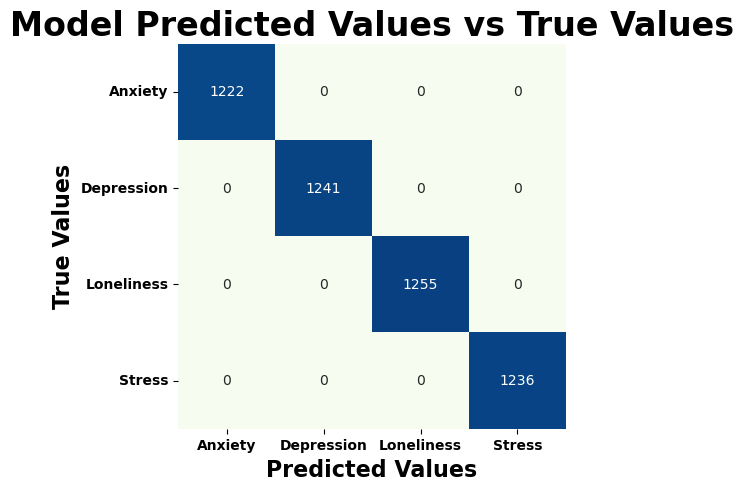

In [247]:
cm= confusion_matrix(yvd2, ypred5)
plt.figure(figsize= (5, 5))
ax= sns.heatmap(cm, annot= True, fmt= 'd', cmap='GnBu', cbar= False)
labels= ['Anxiety', 'Depression', 'Loneliness', 'Stress']
plt.title('Model Predicted Values vs True Values', fontsize= 24, weight= 'bold')
ax.set_xticklabels(labels, weight= 'bold')
ax.set_yticklabels(labels, rotation= 0, weight= 'bold')
ax.set_ylabel('True Values', weight= 'bold', fontsize= 16)
ax.set_xlabel('Predicted Values', weight= 'bold', fontsize= 16)
plt.savefig('conmat5.png')

In [249]:
# Define the parameter grid
param_space= {'penalty': ('l1', 'l2', 'elasticnet', None), 'C': (0.00001, 5.0), 
              'max_iter': (0, 100), 'l1_ratio': (0,1)
}

# Define the model
model6 = LogisticRegression(solver= 'saga', random_state=42)

# Use Bayesian cross-validation 
bsearch6= BayesSearchCV(
    estimator= model6, search_spaces= param_space, scoring= make_scorer(f1_score, average='weighted'),
    cv= StratifiedKFold(n_splits=3), n_iter=30, random_state=0, verbose=0
)
# Fit the data using the best parameters.
bsearch6.fit(xtrn2, ytrn2)

# Use the model on the validation set
bmodel6 = bsearch6.best_estimator_
ypred6 = bmodel6.predict(xvd2)

# Evaluate the model
print("Validation Accuracy Score:", accuracy_score(yvd2, ypred6))

Validation Accuracy Score: 1.0


In [251]:
print(classification_report(ypred6, yvd2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00      1241
           2       1.00      1.00      1.00      1255
           3       1.00      1.00      1.00      1236

    accuracy                           1.00      4954
   macro avg       1.00      1.00      1.00      4954
weighted avg       1.00      1.00      1.00      4954



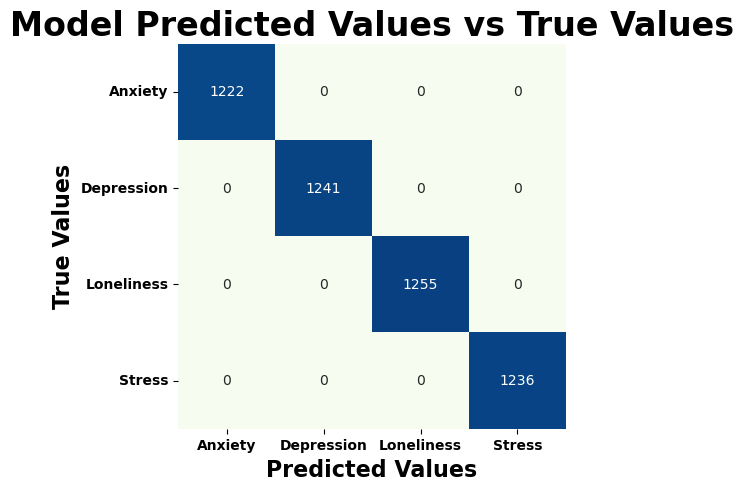

In [253]:
cm= confusion_matrix(yvd2, ypred6)
plt.figure(figsize= (5, 5))
ax= sns.heatmap(cm, annot= True, fmt= 'd', cmap='GnBu', cbar= False)
labels= ['Anxiety', 'Depression', 'Loneliness', 'Stress']
plt.title('Model Predicted Values vs True Values', fontsize= 24, weight= 'bold')
ax.set_xticklabels(labels, weight= 'bold')
ax.set_yticklabels(labels, rotation= 0, weight= 'bold')
ax.set_ylabel('True Values', weight= 'bold', fontsize= 16)
ax.set_xlabel('Predicted Values', weight= 'bold', fontsize= 16)
plt.savefig('conmat6.png')